In [50]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [3]:
flu = pd.read_csv('D:/DS/analytics_edge/2. Linear Regression/FluTrain.csv')

In [4]:
pandas_profiling.ProfileReport(flu)

Number of variables,3
Number of observations,417
Total Missing (%),0.0%
Total size in memory,9.9 KiB
Average record size in memory,24.2 B
Numeric,2
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [5]:
flu.sample(5)

,Week,ILI,Queries
166,2007-03-11 - 2007-03-17,2.427199,0.281541
318,2010-02-07 - 2010-02-13,2.034341,0.410359
301,2009-10-11 - 2009-10-17,6.815222,0.776892
100,2005-12-04 - 2005-12-10,1.653740,0.353254
313,2010-01-03 - 2010-01-09,1.982838,0.525896


In [22]:
max_ILI = flu['ILI'].idxmax()
flu['Week'][max_ILI]

'2009-10-18 - 2009-10-24'

In [23]:
max_Queries = flu['ILI'].idxmax()
flu['Week'][max_Queries]

'2009-10-18 - 2009-10-24'

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


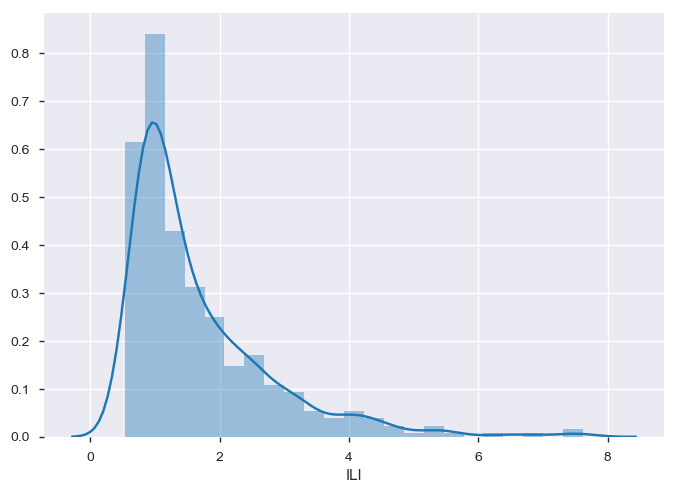

In [24]:
sns.distplot(flu.ILI)

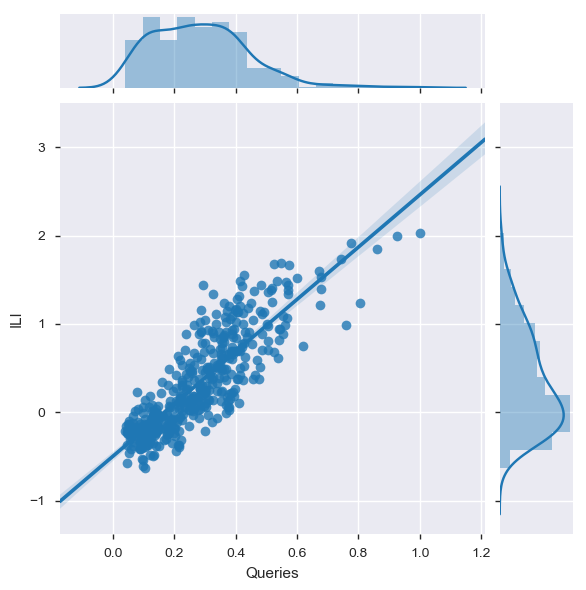

In [29]:
sns.jointplot(x = flu.Queries, y = np.log(flu.ILI), kind = 'reg')

In [36]:
y = np.log(flu['ILI'])

In [37]:
lm = smf.ols(formula = 'y ~ Queries', data =flu).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     1011.
Date:                Fri, 28 Jun 2019   Prob (F-statistic):          2.62e-113
Time:                        02:31:58   Log-Likelihood:                -87.974
No. Observations:                 417   AIC:                             179.9
Df Residuals:                     415   BIC:                             188.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4993      0.030    -16.422      0.000      -0.559      -0.440
Queries        2.9613      0.093     31.800      0.000       2.778       3.144
==============================================================================
Omnibus:                        9.797   Durbin-Watson:                   0.283
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.884
Skew:                           0.373   Prob(JB):                      0.00714
Kurtosis:                       3.112   Cond. No.                         6.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
np.corrcoef(y, flu.Queries)

array([[1.        , 0.84203329],
       [0.84203329, 1.        ]])

In [39]:
r2_score = 0.709
corr = 0.842

In [40]:
r2_score/corr**2

1.0000507783187864

In [43]:
flu_test = pd.read_csv('D:/DS/analytics_edge/2. Linear Regression/FluTest.csv')
queries_test = flu_test['Queries'].values.reshape(-1, 1)
ili_test = flu_test['ILI'].values.reshape(-1, 1)
y2 = np.log(ili_test)

In [45]:
smf.ols(formula = 'y2 ~ queries_test', data = flu_test).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     194.5
Date:                Fri, 28 Jun 2019   Prob (F-statistic):           7.30e-19
Time:                        02:36:32   Log-Likelihood:                 15.206
No. Observations:                  52   AIC:                            -26.41
Df Residuals:                      50   BIC:                            -22.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.6222      0.079     -7.921      0.000      -0.780      -0.464
queries_test     2.5311      0.181     13.948      0.000       2.167       2.896
==============================================================================
Omnibus:                        2.020   Durbin-Watson:                   0.312
Prob(Omnibus):                  0.364   Jarque-Bera (JB):                1.338
Skew:                           0.107   Prob(JB):                        0.512
Kurtosis:                       2.244   Cond. No.                         8.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
from sklearn.linear_model import LinearRegression as linreg
queries = flu['Queries'].values.reshape(-1, 1)
flu_trend = linreg().fit(queries, y = np.log(flu['ILI']))
r2_score = flu_trend.score(queries, y = np.log(flu['ILI']))

In [58]:
flu_trend.score(queries_test, y=np.log(ili_test))

0.21216057874777527

In [60]:
test_ili_predict = np.exp(flu_trend.predict(queries_test))
flu_test['ILI_predict'] = test_ili_predict

Details for 11th March, 2012.

In [63]:
week_index = flu_test['Week'].str.contains('2012-03-11')
flu_test.loc[week_index]

,Week,ILI,Queries,ILI_predict
10,2012-03-11 - 2012-03-17,2.293422,0.432935,2.187378


In [64]:
flu_test.loc[week_index]['ILI_predict'].values[0]

2.1873777211145464

Relative error between estimated and observed error.

In [66]:
pred_val = flu_test.loc[week_index]['ILI_predict'].values[0]
obsr_val = flu_test.loc[week_index]['ILI'].values[0]
print((obsr_val - pred_val) / obsr_val)

0.04623826636474544


RMSE

In [68]:
np.sqrt(np.mean((flu_test['ILI_predict'].values - flu_test['ILI'].values)**2))

0.7490645271019669